<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [6]:
import pandas as pd

# 1. Load the Wholesale customers data
df = pd.read_csv('Wholesale customers data.csv')  # update the path/filename if needed

# 2. First look at the data
print("Dataframe Shape:", df.shape)
df.head()

Dataframe Shape: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [7]:
# Check the data types and non-null counts
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic descriptive statistics
df.describe()

# Check for duplicates
print("\nNumber of duplicated rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB

Missing Values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Number of duplicated rows: 0


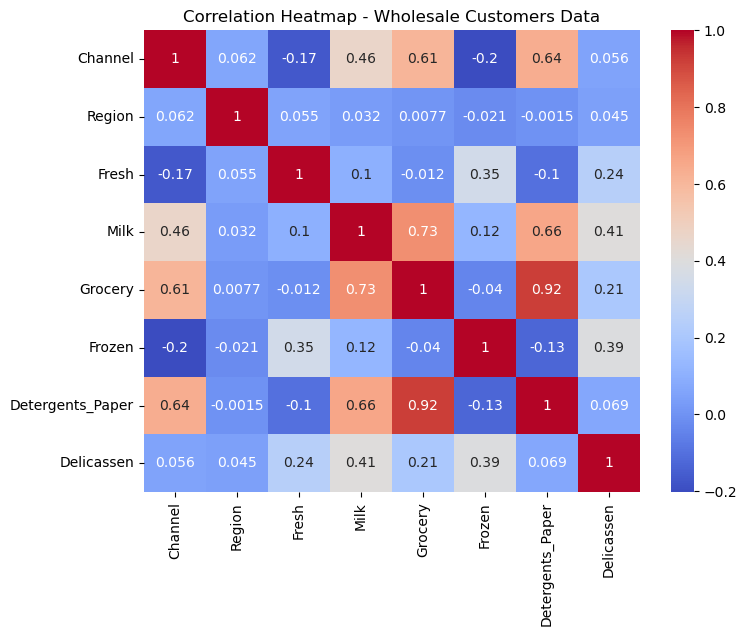

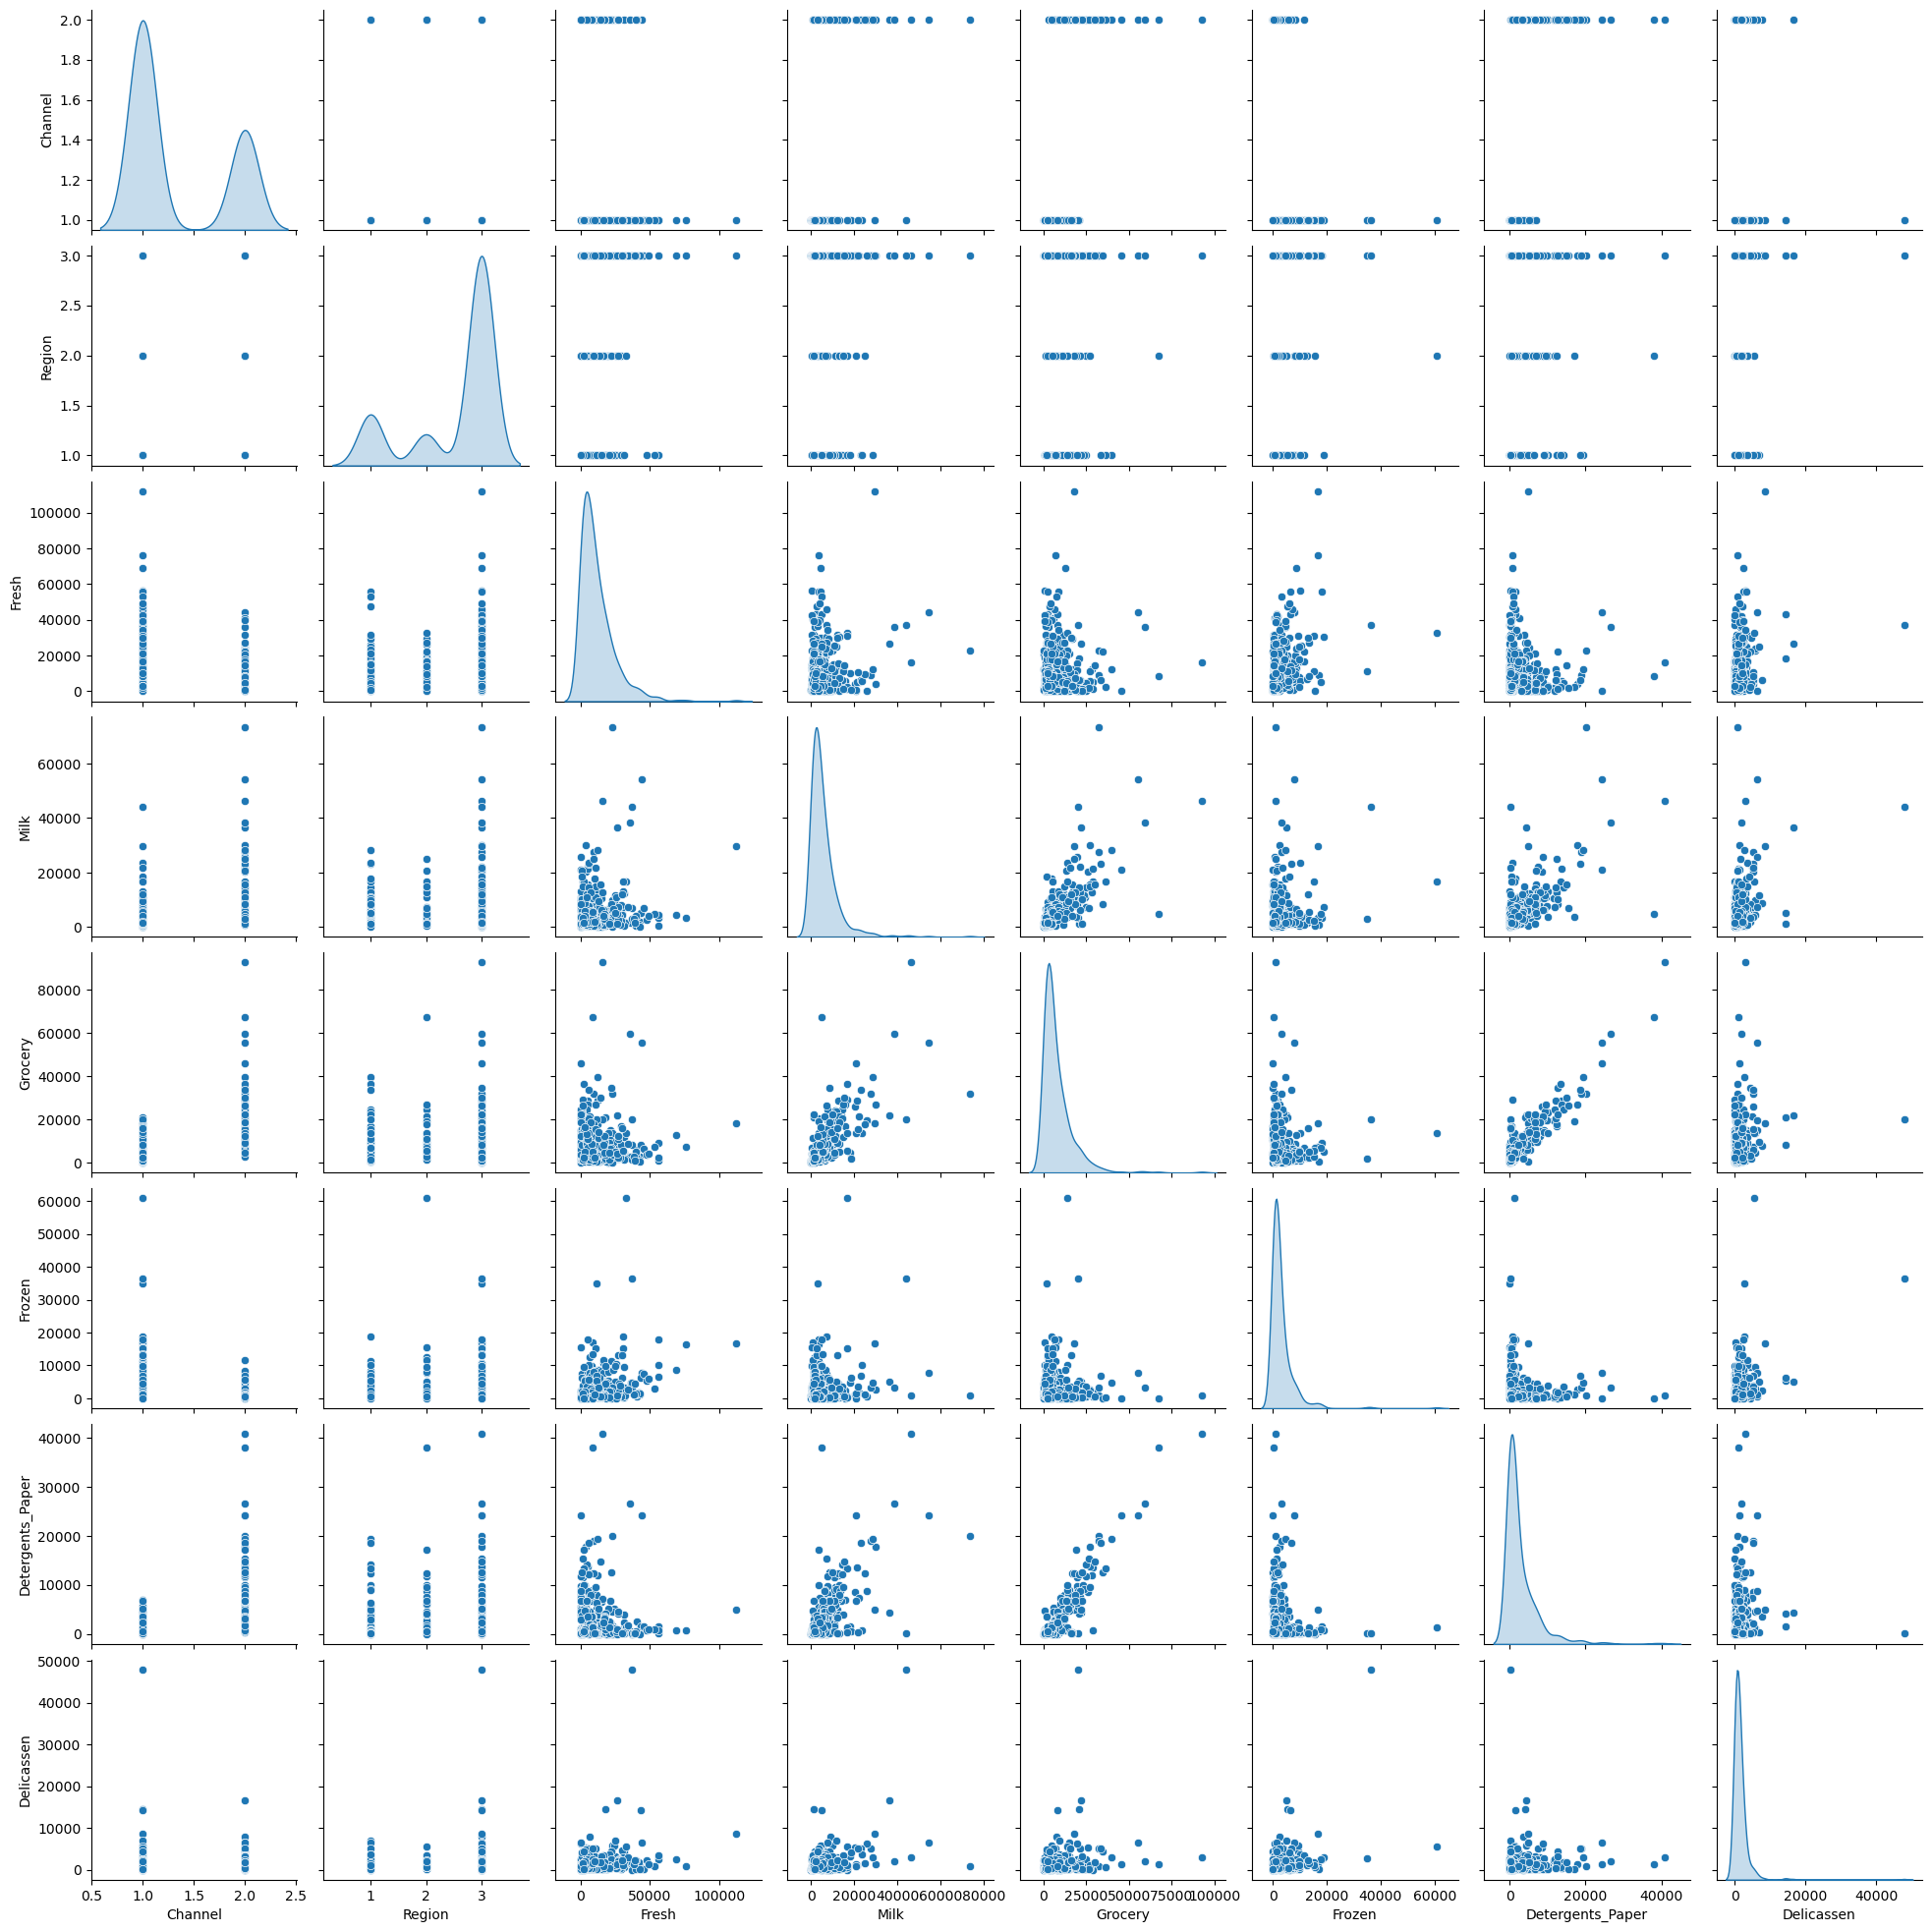

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Wholesale Customers Data")
plt.show()

# Quick pairplot (optional but useful to see distribution patterns)
sns.pairplot(df, diag_kind='kde')
plt.show()


In [9]:
# Example: Checking if ~20% of the highest-spending 'Grocery' customers
# contribute ~80% of total Grocery sales.

df_sorted = df.sort_values(by='Grocery', ascending=False).reset_index(drop=True)
df_sorted['cum_sum'] = df_sorted['Grocery'].cumsum()
df_sorted['cum_perc'] = 100 * df_sorted['cum_sum'] / df_sorted['Grocery'].sum()

df_sorted[['Grocery', 'cum_sum', 'cum_perc']].head(15)


,Grocery,cum_sum,cum_perc
0,92780,92780,2.651947
1,67298,160078,4.575537
2,59598,219676,6.279037
3,55571,275247,7.867432
4,45828,321075,9.177342
5,39694,360769,10.311922
6,36486,397255,11.354808
7,34792,432047,12.349274
8,33586,465633,13.309268
9,32114,497747,14.227188


**Your observations here**

-

Strong Positive Correlations

Grocery & Detergents_Paper show the strongest correlation (≈ 0.92).
Milk & Grocery (≈ 0.73) and Milk & Detergents_Paper (≈ 0.66) also exhibit fairly high positive correlations.
These relationships suggest that customers who spend a lot on grocery items tend to also spend significantly on detergents/paper products and milk.
Moderate Correlations

Channel has moderately positive correlation with Grocery (≈ 0.61) and Detergents_Paper (≈ 0.64). It is more weakly correlated (even slightly negative) with Fresh (≈ -0.17) and Frozen (≈ -0.20).
Fresh & Frozen (≈ 0.35) show some positive correlation but are not as strongly linked as the grocery/detergents/milk trio.
Weak or Near-Zero Correlations

Region generally shows low correlations with the other features (most around 0.05-0.06). It doesn’t appear to drive spending in the different product categories as strongly as Channel does.
Many pairs (e.g., Fresh & Grocery) hover near zero correlation, indicating no strong linear relationship.
Interpretation

The most notable takeaway is that Grocery, Detergents_Paper, and Milk form a highly interconnected trio. Customers who buy a lot in one of these categories are likely to be high-spenders in the others.
Channel (Horeca vs. Retail) somewhat influences purchasing patterns in Grocery and Detergents_Paper, but less so for Fresh and Frozen.
Region does not appear to be a major factor in spending across these categories.
Overall, the heatmap highlights that certain product categories (especially Grocery, Detergents_Paper, and Milk) tend to go hand-in-hand, which could be important for segmenting customers and understanding their buying patterns.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
import numpy as np

# We'll assume your DataFrame is called 'df' and includes numeric columns:
numeric_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

# Calculate Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df[~(
    (df[numeric_cols] < lower_bound) |
    (df[numeric_cols] > upper_bound)
).any(axis=1)].copy()

print("Original shape:", df.shape)

Original shape: (440, 8)


**Your comment here**
I believe that my dataset would benefit from cleaning and transforming before I proceed with clustering. First, I see several outliers in columns such as Fresh, Grocery, and Milk. These extreme values can distort distance-based algorithms like K-Means, so I would remove or cap them to make the data more robust. Second, most of my spending variables are heavily right-skewed. I would either apply a log transform or scale these columns so that large and small spenders are treated more evenly. Of course, if I have a specific business reason to keep outliers, I can choose not to remove them. However, in general, addressing outliers and skewness leads to more stable and interpretable cluster results.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# your code here
# We'll assume 'df_clean' is the DataFrame after any cleaning (or df if no cleaning).
scaler = StandardScaler()

# We choose columns that need scaling (excluding Channel, Region if they are categorical)
features_to_scale = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

# Create a copy for safe-keeping
customers_scale = df_clean.copy()

# Fit and transform the numeric features
customers_scale[features_to_scale] = scaler.fit_transform(customers_scale[features_to_scale])

# Now 'customers_scale' has standardized values for the selected columns
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,2,3,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
3,1,3,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
5,2,3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
6,2,3,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [13]:
from sklearn.cluster import KMeans

# your code here
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(customers_scale[features_to_scale])

# 'labels' is the cluster assignment for each row
labels = kmeans_2.predict(customers_scale[features_to_scale])  # or kmeans_2.labels_
clusters = kmeans_2.labels_.tolist()  # same as labels, but in list form if you prefer

# Attach cluster labels to your DataFrame so you can inspect them
customers_scale['Label'] = labels

# Quick check of cluster distribution
import pandas as pd
pd.Series(labels).value_counts()

1    230
0    102
Name: count, dtype: int64

### Looking to the elbow we can choose 2 like the correct number of clusters

In [21]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [14]:
import pandas as pd

pd.Series(labels).value_counts()

1    230
0    102
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
from sklearn.cluster import DBSCAN

#
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN on the same scaled features (e.g. customers_scale[features_to_scale])
dbscan.fit(customers_scale[features_to_scale])

# The cluster labels are stored in dbscan.labels_
labels_DBSCAN = dbscan.labels_

# Assign them back to the DataFrame for ease of analysis
customers_scale['labels_DBSCAN'] = labels_DBSCAN

# Count the values in 'labels_DBSCAN'
pd.Series(labels_DBSCAN).value_counts()


-1    291
 0     37
 1      4
Name: count, dtype: int64

Count the values in `labels_DBSCAN`.

In [16]:
# Count the values in 'labels_DBSCAN'
pd.Series(labels_DBSCAN).value_counts()

-1    291
 0     37
 1      4
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clusters(df, x, y, cluster_label):
    sns.scatterplot(data=df, x=x, y=y, hue=cluster_label, palette="viridis")
    plt.title(f"{x} vs. {y} by {cluster_label}")
    plt.show()


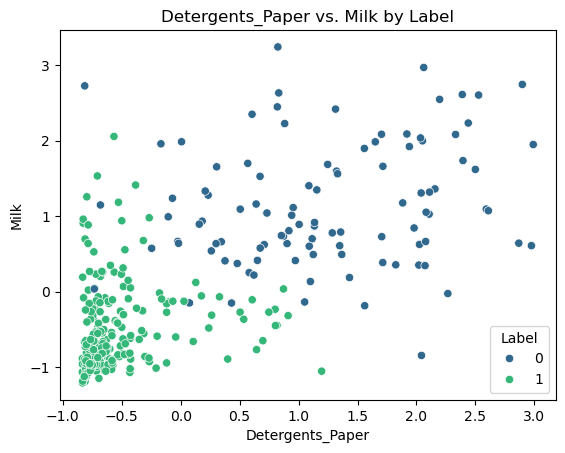

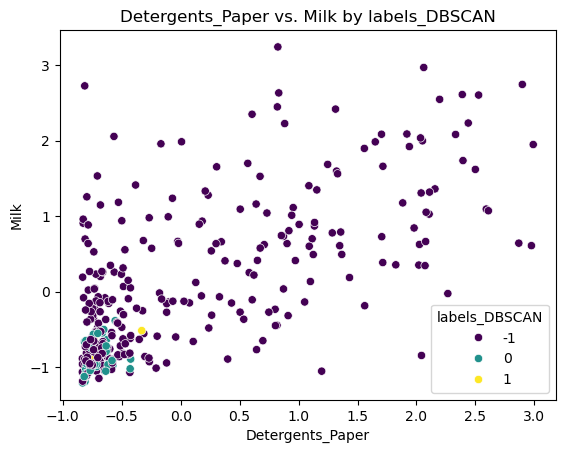

In [18]:
# Plot using K-Means labels
plot_clusters(customers_scale, 'Detergents_Paper', 'Milk', 'Label')

# Plot using DBSCAN labels
plot_clusters(customers_scale, 'Detergents_Paper', 'Milk', 'labels_DBSCAN')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

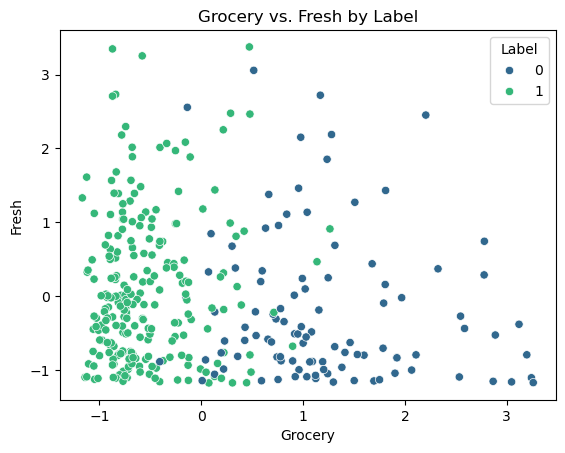

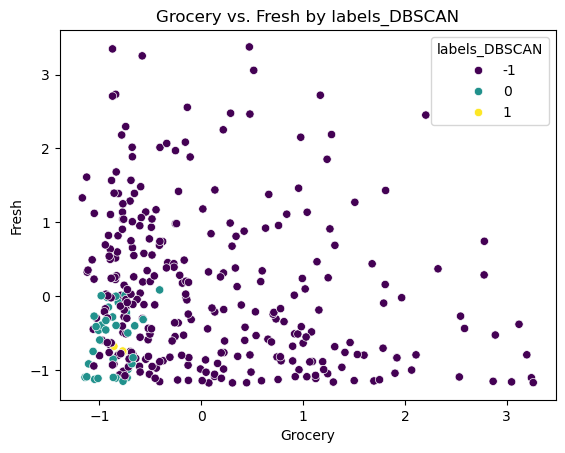

In [19]:
# K-Means labels
plot_clusters(customers_scale, 'Grocery', 'Fresh', 'Label')

# DBSCAN labels
plot_clusters(customers_scale, 'Grocery', 'Fresh', 'labels_DBSCAN')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

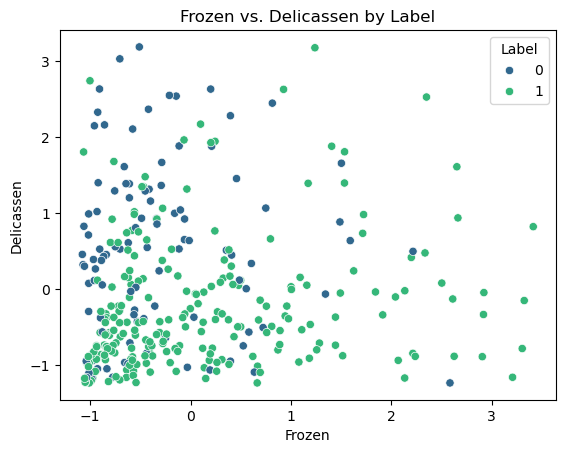

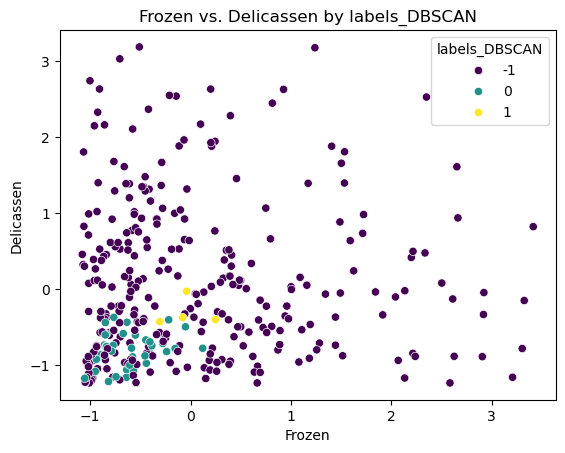

In [20]:
# K-Means labels
plot_clusters(customers_scale, 'Frozen', 'Delicassen', 'Label')

# DBSCAN labels
plot_clusters(customers_scale, 'Frozen', 'Delicassen', 'labels_DBSCAN')


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [21]:
print("K-Means Clusters Means:")
kmeans_means = customers_scale.groupby('Label').mean()
display(kmeans_means)

print("\nDBSCAN Clusters Means:")
dbscan_means = customers_scale.groupby('labels_DBSCAN').mean()
display(dbscan_means)


K-Means Clusters Means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,,,
0,1.794118,2.637255,-0.197072,1.150352,1.212201,-0.306607,1.218233,0.518661,-1.000000
1,1.060870,2.495652,0.087397,-0.510156,-0.537585,0.135974,-0.540260,-0.230015,-0.804348



DBSCAN Clusters Means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,,,
-1,1.32646,2.539519,0.082028,0.120170,0.119701,0.078461,0.099414,0.106492,0.649485
0,1.00000,2.594595,-0.565523,-0.874741,-0.854863,-0.612342,-0.712906,-0.804469,1.000000
1,1.00000,2.000000,-0.736472,-0.650991,-0.800754,-0.043862,-0.638020,-0.305975,1.000000


Which algorithm appears to perform better?

**Your observations here**

K-Means:

Always creates the exact number of clusters I specify (2 in this case).
The algorithm tries to minimize within-cluster distance, resulting in round-ish (hyperspherical) clusters in feature space.
DBSCAN:

Groups points that are densely located together, labeling points that don’t belong in a dense neighborhood as 
−
1
−1 (noise).
Cluster shape can be arbitrary and not necessarily round.
If my data doesn’t have strong density-based structure (or if 
eps
eps is poorly chosen), DBSCAN might place almost everything into one cluster along with several noise points, or it might over-segment the data.
Depending on the scatter plots and summary statistics:

If DBSCAN lumps too many points into a single cluster (and many 
−
1
−1 noise points), I might find K-Means more interpretable for this dataset.
If DBSCAN finds a clear separation that K-Means can’t capture (especially if the cluster boundaries are nonlinear), DBSCAN might be a better fit.
In many real-world situations, I might find K-Means simpler and more intuitive for data like the wholesale spending dataset, particularly when I suspect only a few broad clusters. DBSCAN is more powerful if my data has irregular cluster shapes or if I want to automatically detect outliers.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

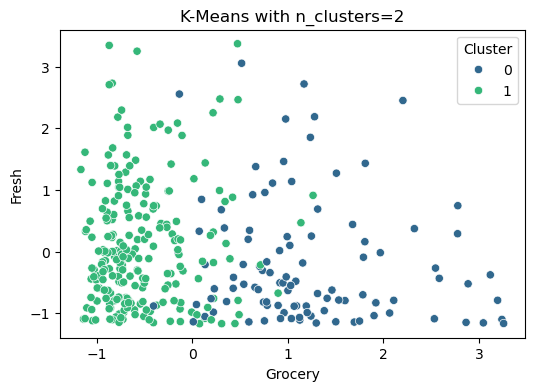

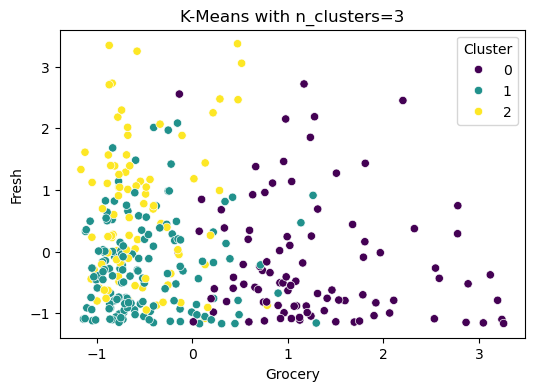

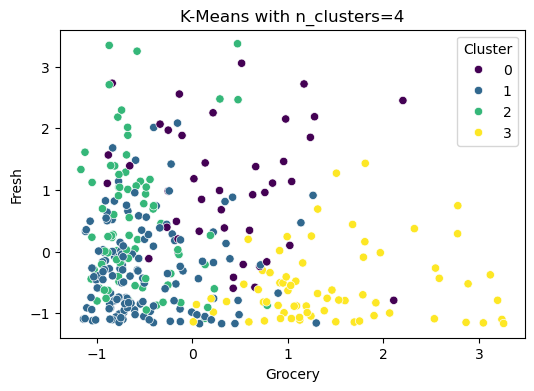

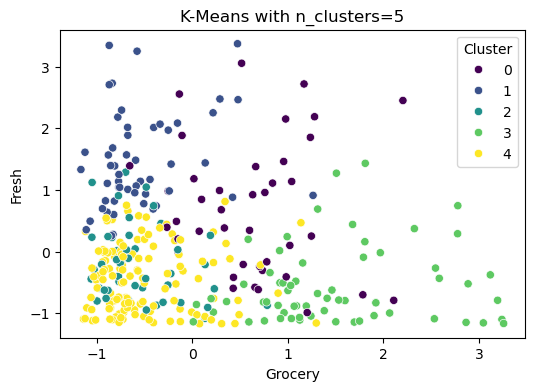

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Let's pick which columns we'll use for the scatter plot
x_col = 'Grocery'  # Example choice
y_col = 'Fresh'    # Example choice

for n_clusters in [2, 3, 4, 5]:
    kmeans_bc = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_bc.fit(customers_scale[features_to_scale])
    
    # Retrieve the cluster labels
    labels_bc = kmeans_bc.labels_
    
    # Plot each configuration
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=customers_scale,
        x=x_col,
        y=y_col,
        hue=labels_bc,
        palette='viridis'
    )
    plt.title(f"K-Means with n_clusters={n_clusters}")
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

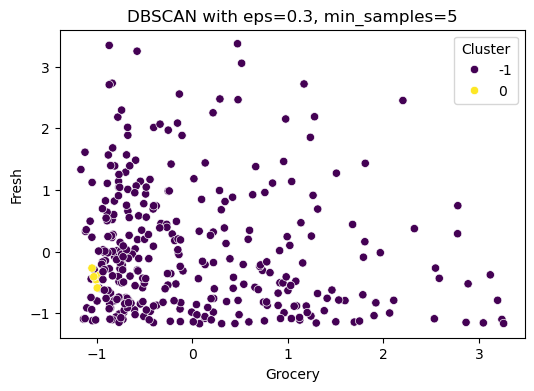

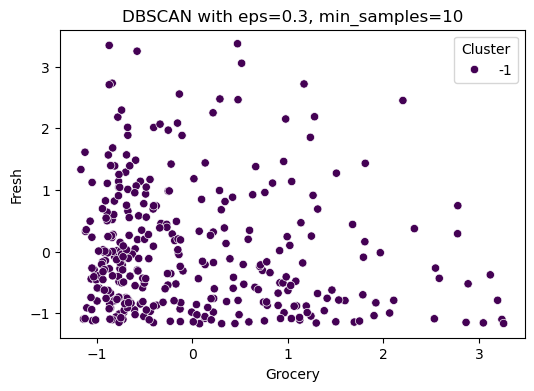

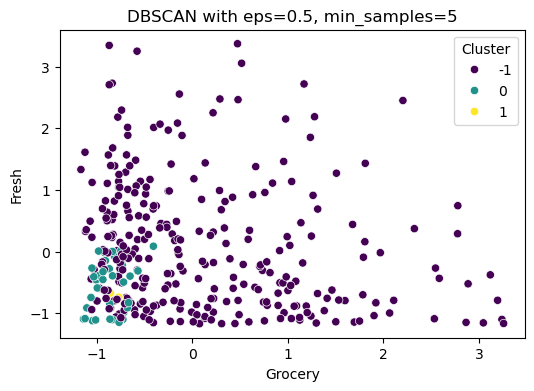

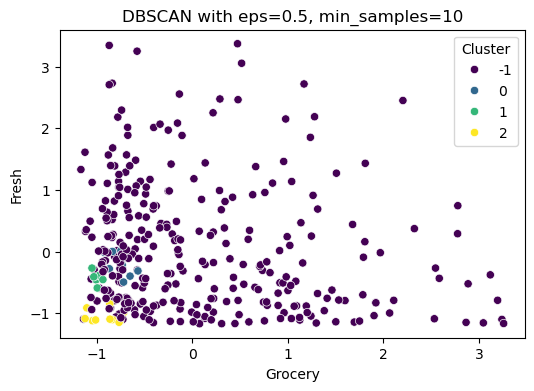

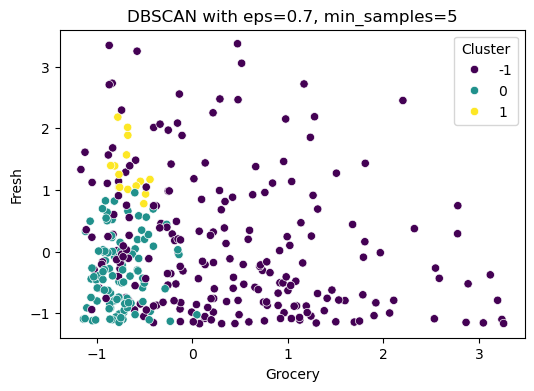

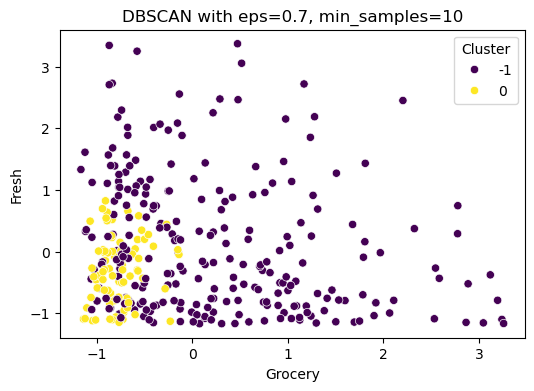

In [23]:
from sklearn.cluster import DBSCAN

# Same columns for consistency in plotting
x_col = 'Grocery'
y_col = 'Fresh'

# We'll define some ranges for eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10]

for eps_ in eps_values:
    for min_samp in min_samples_values:
        dbscan_bc = DBSCAN(eps=eps_, min_samples=min_samp)
        dbscan_bc.fit(customers_scale[features_to_scale])
        
        # Retrieve DBSCAN cluster labels
        labels_dbscan_bc = dbscan_bc.labels_
        
        # Plot the results
        plt.figure(figsize=(6,4))
        sns.scatterplot(
            data=customers_scale,
            x=x_col,
            y=y_col,
            hue=labels_dbscan_bc,
            palette='viridis'
        )
        plt.title(f"DBSCAN with eps={eps_}, min_samples={min_samp}")
        plt.legend(title='Cluster', loc='upper right')
        plt.show()